In [2]:
%matplotlib inline
%cd ..

/Volumes/Data/dev/ctc-executioner


In [24]:
import logging
import numpy as np
from action_space import ActionSpace
from qlearn import QLearn
from order_side import OrderSide
from orderbook import Orderbook
from action_state import ActionState
import pprint
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def train(episodes=100):
    if not orderbook.getStates():
        orderbook.loadFromFile(trainBook)

    for episode in range(episodes):
        # pp.pprint("Episode " + str(episode))
        actionSpace.train(episodes=1, force_execution=False)
        np.save('q.npy', actionSpace.ai.q)
        # pp.pprint(actionSpace.ai.q)
    return actionSpace.ai.q


def test(episodes=100, average=True):
    if not orderbook_test.getStates():
        orderbook_test.loadFromFile(testBook)

    q = np.load('q.npy').item()
    # M <- [t, i, Price, A, Paid, Diff]
    M = actionSpace_test.backtest(q, episodes, average=average)
    return M


def animate(f, interval=5000, axis=[0, 100, -50, 50], frames=None):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.axis(axis)
    ax1.autoscale(True)
    xs = []
    ys = []

    def do_animate(i, f, ax1, xs, ys):
        y = f()
        if len(xs) == 0:
            xs.append(0)
        else:
            xs.append(xs[-1]+1)
        ys.append(y)
        ax1.clear()
        ax1.plot(xs, ys)

    ani = animation.FuncAnimation(
        fig,
        lambda i: do_animate(i, f, ax1, xs, ys),
        interval=interval,
        frames=frames
    )
    return ani
    #plt.show()


def run_profit():
    q = train(1)
    M = test(5, average=False)
    M = np.array(M)
    print(M)
    return np.mean(M[0:, 4])


def run_q_reward():
    q = train(1)
    reward = np.mean(list(q.values()))
    print("Cummultive reward: " + str(reward))
    return reward


# logging.basicConfig(level=logging.DEBUG)
trainBook = 'query_result_train_15m.tsv'
testBook = 'query_result_test_15m.tsv'

side = OrderSide.BUY
levels = [5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -10, -12, -15]
ai = QLearn(actions=levels, epsilon=0.4, alpha=0.3, gamma=0.8)

orderbook = Orderbook(extraFeatures=False)
orderbook_test = Orderbook(extraFeatures=False)

T = [10, 20, 40, 60, 80, 100] #, 120, 240]
T_test = [0, 20, 40, 60, 80, 100] #, 120, 240]

I = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
actionSpace = ActionSpace(orderbook, side, T, I, ai, levels)
actionSpace_test = ActionSpace(orderbook_test, side, T_test, I, ai, levels)


In [25]:
from IPython.display import HTML

[[(100, 1.0, '{}') 16067.5 list([-15, -15, -15, -15, -15, 0]) 16144.0 -76.5]]
[[(100, 1.0, '{}') 16154.0 list([-15, -15, -12, -15, -15, 0]) 16155.0 -1.0]]
[[(100, 1.0, '{}') 16154.5 list([-15, -15, -12, -15, -15, 0])
  16146.27166228 8.228337720000127]]
[[(100, 1.0, '{}') 16154.5 list([-15, -15, -15, -10, -15, 0]) 16136.0 18.5]]
[[(100, 1.0, '{}') 16130.5 list([-12, -15, -12, -10, -15, 0]) 16116.0 14.5]]
[[(100, 1.0, '{}') 16122.0 list([-12, -10]) 16088.0 34.0]]
[[(100, 1.0, '{}') 16187.5 list([-12, -10]) 16155.0 32.5]]
[[(100, 1.0, '{}') 16135.0 list([-12, -10, -10, -7]) 16100.0 35.0]]
[[(100, 1.0, '{}') 16131.5 list([-12, -10, -10, -7, -15]) 16087.0 44.5]]
[[(100, 1.0, '{}') 16194.5 list([-12, -10, -7, -7, -15, 0])
  16182.676509290401 11.823490709599355]]
[[(100, 1.0, '{}') 16194.5 list([-12, -10, -7, -7, -15, 0])
  16182.676509290401 11.823490709599355]]
[[(100, 1.0, '{}') 16104.5 list([-12, -10, -12, -7, -15, 0]) 16111.66570583
  -7.165705830000661]]
[[(100, 1.0, '{}') 16073.5 lis

[[(100, 1.0, '{}') 16104.5 list([-10, -5, -5, -6, -2]) 16121.0 -16.5]]


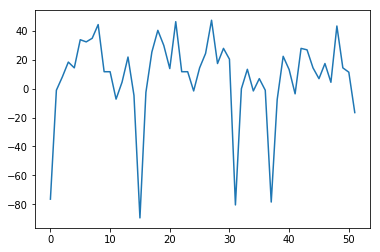

In [ ]:
ani = animate(run_profit, interval=1000, frames=50)
HTML(ani.to_jshtml())

In [ ]:
ani = animate(run_q_reward, interval=1000, frames=50)
HTML(ani.to_jshtml())

Cummultive reward: -0.226698011682
Cummultive reward: -0.219651326725
Cummultive reward: -0.252206712726
Cummultive reward: -0.238710407278
Cummultive reward: -0.228369468102
Cummultive reward: -0.222276751944
Cummultive reward: -0.212957112836
Cummultive reward: -0.244125928747
Cummultive reward: -0.188513528592
Cummultive reward: -0.19822549481
Cummultive reward: -0.185738038588
Cummultive reward: -0.154067429441
Cummultive reward: -0.125686006697
Cummultive reward: -0.12926027895
Cummultive reward: -0.103569020305
Cummultive reward: -0.122185386733
Cummultive reward: -0.0851681079671
Cummultive reward: -0.101901057128
Cummultive reward: -0.121297062088
Cummultive reward: -0.0742117908009
Cummultive reward: -0.0893512914005
Cummultive reward: -0.0743810824876
Cummultive reward: -0.0540543809389
Cummultive reward: -0.0462658010916
Cummultive reward: -0.0746871531866
Cummultive reward: -0.0563675061325
Cummultive reward: -0.065189267971
Cummultive reward: -0.0862740362016
Cummultive re